In [1]:
from hypernetworks.core.Hypernetwork import Hypernetwork
from hypernetworks.core.Hypersimplex import VERTEX, ALPHA, BETA, hstype_to_str
from hypernetworks.utils.HTCompiler import load_parser, compile_hn
from hypernetworks.utils.HTGraph import draw_hn

from IPython.display import Image, display

In [2]:
parser = load_parser()

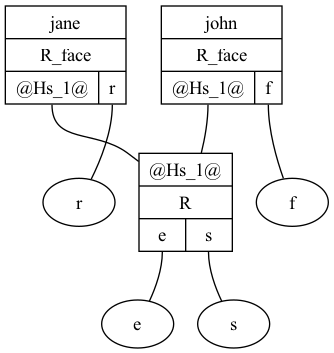

In [3]:
faces = Hypernetwork()

# compile_hn(faces, parser, """
#     <e, s, r; R_face>
#     <e, f, r; R_face>
#     <e, s, sq; R_face>
# """)

compile_hn(faces, parser, """
    jane = <<e, s>, r; R_face>
    john = <<e, s>, f; R_face>
""")

draw_hn(faces, fname="/tmp/faces", view=False)
Image(filename='/tmp/faces.png', width=500, height=500)

In [4]:
from hypernetworks.utils.QAnalysis import generate_test_matrix, get_incidence_matrix, QAnalysis
import numpy as np



X1 = ['Fred', 'Jill', 'Mary', 'Bill', 'John', 'Susan', 'Gareth', 'Angela']
Y1 = ['000', '100', '200', '300', '400', '500', '600', '700', '800', '900']

M1 = [
    [0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 1, 1, 1],
    [0, 1, 1, 1, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 1, 1, 0, 0, 0],
    [0, 0, 0, 1, 1, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 1, 0, 0, 1, 0, 0],
    [1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
]

X2 = ['esr', 'efr', 'efsq']
M2 = [
    ['e', 's', 'r'],
    ['e', 'f', 'r'],
    ['e', 'f', 'sq']
]


def test(m, titles, trans=False):
    im, Y = get_incidence_matrix(m)
    print()
    print(np.array(m))
    print()
    print("Incidence Matrix: " + str(Y))
    print(im)
    print()
    im = im.T if trans else im
    titles = Y if trans else titles
    Q = QAnalysis(im, titles)
    K = np.array(Q.K)
    print("K: ")
    print(K)

    Qa = Q.qcomponents
    ecc = Q.ecc
    print()
    print("Names:    " + str(np.array(titles)))
    print("Q top:    " + str(Q.top_q))
    print("Q bottom: " + str(Q.bottom_q))
    print("Eccentricity:")
    for n, e in zip(titles, ecc):
        print("\t" + n + " = " + str(e))

    print()
    print("Q Components:")

    for i in reversed(range(len(Qa))):
        print("\t" + str(i) + ":")

        for x in Qa[i]:
            print("\t\t" + str(x))


test(M2, X2)
# test(M1, Y1, trans=True)


[['e' 's' 'r']
 ['e' 'f' 'r']
 ['e' 'f' 'sq']]

Incidence Matrix: ['e' 'f' 'r' 's' 'sq']
[[1 0 1 1 0]
 [1 1 1 0 0]
 [1 1 0 0 1]]

K: 
[[2 1 0]
 [1 2 1]
 [0 1 2]]

Names:    ['esr' 'efr' 'efsq']
Q top:    [2 2 2]
Q bottom: [1 1 1]
Eccentricity:
	esr = 0.5
	efr = 0.5
	efsq = 0.5

Q Components:
	2:
		{'esr'}
		{'efr'}
		{'efsq'}
	1:
		{'efsq', 'efr', 'esr'}
	0:
		{'efsq', 'efr', 'esr'}


In [5]:
test(M1, Y1)


[[0 0 0 0 0 1 1 0 0 0]
 [0 0 0 0 1 0 0 1 1 1]
 [0 1 1 1 0 0 0 0 0 0]
 [1 0 0 0 0 1 1 0 0 0]
 [0 0 0 1 1 0 0 0 0 1]
 [1 0 0 0 1 0 0 1 0 0]
 [1 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]]

Incidence Matrix: [0 1]
[[1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]]



IndexError: index 8 is out of bounds for axis 0 with size 8